### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

C:\Users\ay011\anaconda3\envs\dsl\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] 지정된 모듈을 찾을 수 없습니다
  warn(f"Failed to load image Python extension: {e}")


In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 512

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### 데이터 일부 확인

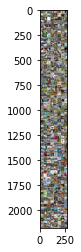

deer  frog  frog  dog   plane truck frog  cat   plane deer  ship  bird  deer  dog   frog  horse truck cat   bird  truck plane frog  horse cat   truck cat   ship  horse ship  plane bird  car   deer  frog  cat   frog  frog  dog   truck dog   dog   cat   ship  frog  frog  bird  deer  horse dog   cat   cat   deer  deer  dog   frog  ship  cat   frog  bird  frog  car   deer  horse truck car   car   horse plane bird  frog  bird  frog  deer  dog   plane ship  car   plane frog  horse horse plane plane cat   bird  plane dog   ship  car   dog   ship  plane deer  cat   horse deer  deer  horse cat   cat   horse dog   deer  ship  car   frog  car   bird  ship  dog   frog  cat   frog  car   frog  dog   car   dog   frog  truck bird  cat   bird  deer  horse ship  truck cat   deer  cat   deer  cat   plane plane bird  dog   dog   horse dog   ship  dog   bird  horse bird  truck bird  car   bird  ship  ship  horse bird  deer  car   horse horse truck frog  ship  dog   deer  ship  cat   deer  dog   dog   frog

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!

In [6]:
import torch.nn as nn

In [7]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, padding=1),  # (32, 32, 32)
            nn.ReLU()
        )
                
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1), # (64, 32, 32)
            nn.MaxPool2d(kernel_size=2,stride=2),                               #  (64, 16, 16)
            nn.ReLU()
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1), # (128, 16, 16)
            nn.ReLU()
        )
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1), # (256, 16, 16)
            nn.MaxPool2d(kernel_size=2,stride=2),                               #  (256, 8, 8)
            nn.ReLU()
        )
        
        self.fc1 = nn.Sequential(
            nn.Linear(256*8*8, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )
        
        


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0),-1) 
        out = self.fc1(out)        
        return out

net = Net().to(device)

## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [9]:
from torchsummary import summary
summary(net,(3,32,32), batch_size=256) 


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [256, 32, 32, 32]             896
              ReLU-2          [256, 32, 32, 32]               0
            Conv2d-3          [256, 64, 32, 32]          18,496
         MaxPool2d-4          [256, 64, 16, 16]               0
              ReLU-5          [256, 64, 16, 16]               0
            Conv2d-6         [256, 128, 16, 16]          73,856
              ReLU-7         [256, 128, 16, 16]               0
            Conv2d-8         [256, 256, 16, 16]         295,168
         MaxPool2d-9           [256, 256, 8, 8]               0
             ReLU-10           [256, 256, 8, 8]               0
           Linear-11                [256, 1024]      16,778,240
             ReLU-12                [256, 1024]               0
           Linear-13                  [256, 10]          10,250
Total params: 17,176,906
Trainable para

## Train

In [10]:
from tqdm import tqdm

In [12]:
# 모델을 학습
net.train()
for epoch in tqdm(range(25)):

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs = data[0].to(device)
        labels = data[1].to(device)        
        
        ##### 아래 작성 #####
        optimizer.zero_grad()
        output = net.forward(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        
        
        running_loss += loss.item()


    print(f'Epoch : {epoch + 1} loss: {running_loss / (i+1):.4f}')

print('Finished Training')

  4%|███▎                                                                               | 1/25 [00:16<06:34, 16.43s/it]

Epoch : 1 loss: 2.2973


  8%|██████▋                                                                            | 2/25 [00:32<06:17, 16.42s/it]

Epoch : 2 loss: 2.2919


 12%|█████████▉                                                                         | 3/25 [00:49<06:00, 16.41s/it]

Epoch : 3 loss: 2.2786


 16%|█████████████▎                                                                     | 4/25 [01:05<05:45, 16.45s/it]

Epoch : 4 loss: 2.2331


 20%|████████████████▌                                                                  | 5/25 [01:22<05:30, 16.52s/it]

Epoch : 5 loss: 2.1184


 24%|███████████████████▉                                                               | 6/25 [01:39<05:14, 16.57s/it]

Epoch : 6 loss: 2.0321


 28%|███████████████████████▏                                                           | 7/25 [01:55<04:57, 16.52s/it]

Epoch : 7 loss: 1.9664


 32%|██████████████████████████▌                                                        | 8/25 [02:11<04:40, 16.49s/it]

Epoch : 8 loss: 1.8931


 36%|█████████████████████████████▉                                                     | 9/25 [02:28<04:23, 16.47s/it]

Epoch : 9 loss: 1.8212


 40%|████████████████████████████████▊                                                 | 10/25 [02:44<04:06, 16.47s/it]

Epoch : 10 loss: 1.7628


 44%|████████████████████████████████████                                              | 11/25 [03:01<03:50, 16.47s/it]

Epoch : 11 loss: 1.7157


 48%|███████████████████████████████████████▎                                          | 12/25 [03:17<03:34, 16.52s/it]

Epoch : 12 loss: 1.6719


 52%|██████████████████████████████████████████▋                                       | 13/25 [03:35<03:20, 16.70s/it]

Epoch : 13 loss: 1.6319


 56%|█████████████████████████████████████████████▉                                    | 14/25 [03:51<03:03, 16.72s/it]

Epoch : 14 loss: 1.5929


 60%|█████████████████████████████████████████████████▏                                | 15/25 [04:08<02:47, 16.74s/it]

Epoch : 15 loss: 1.5582


 64%|████████████████████████████████████████████████████▍                             | 16/25 [04:25<02:30, 16.73s/it]

Epoch : 16 loss: 1.5245


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [04:42<02:13, 16.73s/it]

Epoch : 17 loss: 1.4933


 72%|███████████████████████████████████████████████████████████                       | 18/25 [04:58<01:57, 16.77s/it]

Epoch : 18 loss: 1.4649


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [05:15<01:40, 16.81s/it]

Epoch : 19 loss: 1.4407


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [05:32<01:24, 16.81s/it]

Epoch : 20 loss: 1.4166


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [05:49<01:07, 16.81s/it]

Epoch : 21 loss: 1.3957


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [06:05<00:50, 16.72s/it]

Epoch : 22 loss: 1.3767


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [06:22<00:33, 16.66s/it]

Epoch : 23 loss: 1.3555


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [06:38<00:16, 16.61s/it]

Epoch : 24 loss: 1.3392


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:55<00:00, 16.62s/it]

Epoch : 25 loss: 1.3221
Finished Training


## Test

In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [14]:
## 아래 코드 그대로 실행
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
net.eval()
with torch.no_grad():
    for data in testloader:
        images = data[0].to(device)
        labels = data[1].to(device)
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 51 %


## 클래스별 accuracy 비교

In [15]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images = data[0].to(device)
        labels = data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.1 %
Accuracy for class: car   is 82.0 %
Accuracy for class: bird  is 44.4 %
Accuracy for class: cat   is 35.3 %
Accuracy for class: deer  is 26.2 %
Accuracy for class: dog   is 37.6 %
Accuracy for class: frog  is 71.1 %
Accuracy for class: horse is 52.5 %
Accuracy for class: ship  is 64.6 %
Accuracy for class: truck is 39.7 %
